### 선형회귀 
- 선을 사용, 실제값과 예측값의 차이를 계산해서 평균하면 모델의 오차를 찾을 수 있음(오차가 적은 선을 최적의 선으로 사용함
 
- 그러나, 정확한 예측이 아니고 그래프가 **제 1사분면을 벗어날 경우** 문제가 발생 

### 회귀 모델
- 농어의 길이로 무게를 예측하자!
- 데이터 다운로드 : https://gist.github.com/rickiepark 


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [19]:
# 농어 길이
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
                         21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
                         23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
                         27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
                         39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
                         44.0])
# 농어 무게
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
                         115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
                         150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
                         218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
                         556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
                         850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
                         1000.0])


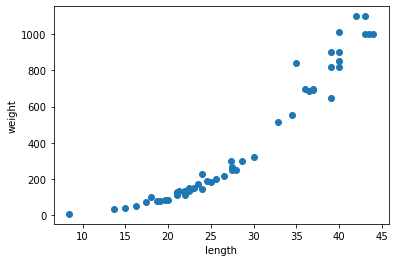

In [21]:
# 데이터 시각화
# 농어의 길이가 늘어나면, 무게도 늘어난다
# => 양의 상관관계
# 상관계수값 : -1~1 (0.4 이상 정도 되면 관계가 있다고 판단함)

plt.scatter(perch_length, perch_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()


### 데이터 분리

In [23]:
from sklearn.model_selection import train_test_split


x_train, x_test, y_train, y_test = train_test_split( perch_length, perch_weight, random_state=42)
# 클래스가 1개이므로 random 추출 => 샘플링 편향이 일어날 수 있음


print(x_train.shape)
print(x_test.shape)


(42,)
(14,)


#### scikit-learn 모듈 : 머신러닝 모델 사용
> 반드시 2차원 배열(행렬)값을 모델의 입력데이터로 사용
> - 1차원 배열 [1,2,3,4,5]
> - 2차원 배열 [[1], [2], [3]]

In [26]:
x_train = x_train.reshape(-1, 1)
x_test = x_test.reshape(-1, 1)

print(x_train.shape)
print(x_test.shape)

(42, 1)
(14, 1)


In [27]:
from sklearn.linear_model import LinearRegression

# 새로운 모델 생성
lr = LinearRegression()

# 모델 학습
lr.fit(x_train, y_train)

LinearRegression()

In [29]:
# 50cm 농어의 무게를 예측
print(lr.predict([[50]]))   # g(그램)

[1241.83860323]


#### 직선의 방정식 => y = ax + b
- y : 농어 무게
- x : 농어 길이
- a : 기울기 -> coefficient(계수)
- b : 절편

In [30]:
# 직선의 방정식에서 a와 b의 값
print(lr.coef_, lr.intercept_)

[39.01714496] -709.0186449535474


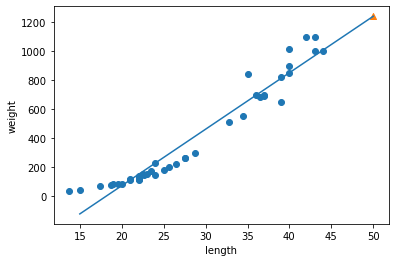

In [32]:
plt.scatter(x_train, y_train)
plt.plot([15, 50], [15*lr.coef_ + lr.intercept_, 50*lr.coef_ + lr.intercept_])

plt.scatter(50, 1241.8, marker='^')  # 예측한 결과도 그래프 시각화
plt.xlabel('length')
plt.ylabel('weight')
plt.show()


In [34]:
# 2차방정식 구하기 위해서 2차원 배열로 만들기
# numpy의 column_stack 함수 : 열 방향으로 배열을 합쳐줌

train_poly = np.column_stack((x_train**2, x_train))
test_poly = np.column_stack((x_test**2, x_test))


print(x_train.shape)
print(train_poly.shape)


(42, 1)
(42, 2)


In [35]:
lr = LinearRegression()
lr.fit(train_poly, y_train)

coef = lr.coef_
intercept = lr.intercept_
print(coef, intercept)


[  1.01433211 -21.55792498] 116.05021078278259


In [112]:
coef = lr.coef_
intercept = lr.intercept_
print(coef, intercept)

[  1.01433211 -21.55792498] 116.05021078278304


y = 1.014x2−21.5579x+116.05 이라는 그래프 

In [37]:
# 길이가 40인 농어의 무게를 예측하기
### 훈련과정과 동일하게 길이의 제곱을 함께 넣어주어야한다 ###
print(lr.predict([[40**2, 40]]))

[876.66458663]


In [114]:
# 길이가 40인 농어의 무게를 예측하기 
### * 훈련과정과 동일하게 길이의 제곱을 함께 넣어주어야한다 ###
print(lr.predict([[40**2, 40]]))  

# 예측한 무게 : 876


[876.66458663]


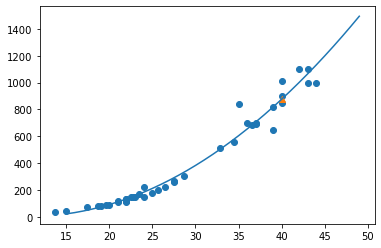

In [39]:
point = np.arange(15, 50) # x값의 범위 설정

plt.scatter(x_train, y_train)
# 방정식 그리기 : y = ax**2 + bx + c

plt.plot(point, coef[0]*point**2 + coef[1]*point + intercept)
plt.scatter([40], [876], marker='^')  # 예측값 포함하여 시각화
plt.show()


In [40]:

print(lr.score(train_poly, y_train))  
print(lr.score(test_poly, y_test))


0.9706807451768623
0.9775935108325121


### 참고: 만약 KNN 회귀였다면?

In [42]:
# 회귀모델 사용
from sklearn.neighbors import KNeighborsRegressor


# 모델 생성
knr = KNeighborsRegressor()

# 모델 학습
knr.fit(x_train, y_train)

# 모델 평가
print(knr.score(x_train, y_train))  # 0.9698823289099254
print(knr.score(x_test, y_test))  # 0.992809406101064


0.9698823289099254
0.992809406101064


In [43]:
# 모델 평가
print(knr.score(x_train, y_train))  # 0.9698823289099254
print(knr.score(x_test, y_test))  # 0.992809406101064


0.9698823289099254
0.992809406101064


In [44]:
knr.n_neighbors = 3  # 이웃의 수를 5에서 3으로 줄임
knr.fit(x_train, y_train)

print(knr.score(x_train, y_train))  # 0.9804899950518966
print(knr.score(x_test, y_test))  # 0.9746459963987609


0.9804899950518966
0.9746459963987609


In [45]:
# 길이가 100인 농어의 무게를 예측

print(knr.predict([[100]])) # [1033.33333333]

[1033.33333333]


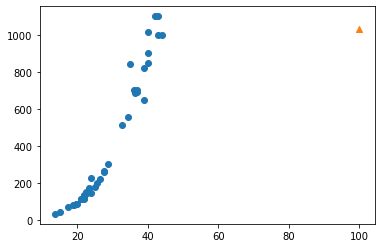

In [49]:
plt.scatter(x_train, y_train)
# 방정식 그리기 : y = ax**2 + bx + c
plt.scatter([100], [1033.33], marker='^')  # 예측값 포함하여 시각화
plt.show()
